# Workspace \#5: ``routines.py``

In [1]:
# %load firstcell.py
# autoreloading for imported modules
%load_ext autoreload
%autoreload 2

# getting future division
from __future__ import division

# numpy
import numpy as np
from numpy import pi, sqrt, log, log10, power, exp

#scipy
from scipy.interpolate import interp1d

# matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib.lines import Line2D

# other
import os
from tqdm import tqdm

# matplotlib style
%matplotlib inline

%config InlineBackend.figure_format = "retina"
rcParams['figure.figsize'] = (13, 8)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['New Times Roman']
rc('text', usetex=True)

# current directory
current_dir = os.getcwd()

In [2]:
from random import random

import sys
sys.path.insert(0, '../')

import constants as ct
import particle as pt
import astro as ap
import echo as ec
import routines as rt

In [3]:
# The contents of routines.py
dir(rt)

['SKA_rescaled_specs',
 'Snu_rescale_axion',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ap',
 'ax_in',
 'ct',
 'def_A',
 'def_D',
 'def_L0',
 'def_S0',
 'def_alpha',
 'def_b',
 'def_l',
 'def_nu_pivot',
 'def_solid',
 'def_t0',
 'def_tmin',
 'def_tpk',
 'def_tt',
 'default_Snu_echo_kwargs',
 'default_data',
 'default_source_input',
 'division',
 'ec',
 'exp',
 'fixed_axion_routine',
 'full_routine',
 'log',
 'log10',
 'np',
 'pi',
 'power',
 'pt',
 'rescale_routine',
 'sqrt',
 'trapz']

In [4]:
# rescale factor for spectral irradiance:
rt.Snu_rescale_axion(3.e-6, 1.e-10, 1.e-6, 1.e-10)

0.19245008972987523

In [5]:
# echo computation at fixed axion properties
test_out = {}
rt.fixed_axion_routine(1.e-10, test_out)

(8.27133561166016e-06,
 1e-10,
 {'source_t-nu-Snu': (array([1.00000000e-04, 1.00345985e-04, 1.00693167e-04, ...,
          9.93116048e+10, 9.96552080e+10, 1.00000000e+11]),
   1.0,
   array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.60250724e-13, 1.59367588e-13, 1.58489319e-13])),
  'echo_Snu': 8.462336769267926e-09,
  'signal_nu': 1.0,
  'signal_delnu': 0.001,
  'signal_Omega': 1e-06,
  'signal_Snu': 8.462336769267926e-09,
  'signal_S_echo': 1.3536882890405862e-38,
  'signal_power': 2.005261243400817e-19,
  'noise_nu': 1.0,
  'noise_delnu': 0.001,
  'noise_Omega_res': 7.209937878656228e-08,
  'noise_Omega_obs': 1e-06,
  'noise_T408': 38.776005,
  'noise_Tnu': 29.66777100881154,
  'noise_power': 5.2363230695025524e-17,
  'S/N': 0.0038295216257374963})

In [21]:
# full routine for an array of axion masses:
test_out = {}

new_out = rt.full_routine(np.logspace(-7, -3), 1.e-9, 1.e-10, test_out)

print(test_out.keys())
print(new_out.keys())

dict_keys(['source_t-nu-Snu', 'echo_Snu', 'signal_nu', 'signal_delnu', 'signal_Omega', 'signal_Snu', 'signal_S_echo', 'signal_power', 'noise_nu', 'noise_delnu', 'noise_Omega_res', 'noise_Omega_obs', 'noise_T408', 'noise_Tnu', 'noise_power', 'S/N'])
dict_keys(['echo_Snu', 'signal_nu', 'signal_delnu', 'signal_Omega', 'signal_Snu', 'signal_S_echo', 'signal_power', 'noise_nu', 'noise_delnu', 'noise_Omega_res', 'noise_Omega_obs', 'noise_T408', 'noise_Tnu', 'noise_power', 'S/N', 'ma', 'ga'])


In [47]:
print(test_out)

{'source_t-nu-Snu': (array([1.00000000e-04, 1.00345985e-04, 1.00693167e-04, ...,
       9.93116048e+10, 9.96552080e+10, 1.00000000e+11]), 1.0, array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.60250724e-13, 1.59367588e-13, 1.58489319e-13])), 'echo_Snu': 8.462336769267926e-09, 'signal_nu': 1.0, 'signal_delnu': 0.001, 'signal_Omega': 1e-06, 'signal_Snu': 8.462336769267926e-09, 'signal_S_echo': 1.3536882890405862e-38, 'signal_power': 2.005261243400817e-19, 'noise_nu': 1.0, 'noise_delnu': 0.001, 'noise_Omega_res': 7.209937878656228e-08, 'noise_Omega_obs': 1e-06, 'noise_T408': array(38.776005, dtype=float32), 'noise_Tnu': 29.66777100881154, 'noise_power': 5.2363230695025524e-17, 'S/N': 0.0038295216257374963}


Comparing ``routines.py`` with the pedestrian ``echo.py`` method:

In [49]:
ma_new, ga_new = 1.e-5, 1.e-9
ga_ref = 1.e-10
nu_ma = pt.nu_from_ma(ma_new)

ori_out = {}

ec.Snu_source(ap.t_arr_default, nu_ma, rt.default_source_input, output=ori_out)
ec.Snu_echo(rt.default_source_input, rt.ax_in(ma_new, ga_new), rt.default_data,
            recycle_output=(True, ori_out),
            **rt.default_Snu_echo_kwargs)
ec.signal(rt.default_source_input, rt.ax_in(ma_new, ga_new), rt.default_data,
          recycle_output=(True, ori_out),
          **rt.default_Snu_echo_kwargs)
ec.noise(rt.default_source_input, rt.ax_in(ma_new, ga_new), rt.default_data,
         recycle_output=(True, ori_out))
ec.sn_ratio(ori_out['signal_power'], ori_out['noise_power'], output=ori_out)

print('original output (computing by hand w/ echo.py only):\n', ori_out)

routine_out = {}
new_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out)
print('\nusing routines.py:\npivot values output:\n', routine_out)
print('\nnew output (w/ routines.py):\n', new_out)

compare = [ori_out[key]/new_out[key] for key in new_out.keys() if key in ori_out.keys()]
answer = bool(int(np.product(compare)))

print('\n\nDo they match?: {}\n'.format(answer), 'ratio:', compare)

original output (computing by hand w/ echo.py only):
 {'source_t-nu-Snu': (array([1.00000000e-04, 1.00345985e-04, 1.00693167e-04, ...,
       9.93116048e+10, 9.96552080e+10, 1.00000000e+11]), 1.2089945892055125, array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.45743039e-13, 1.44939855e-13, 1.44141096e-13])), 'echo_Snu': 6.365811417620257e-07, 'signal_nu': 1.2089945892055125, 'signal_delnu': 0.0012089945892055126, 'signal_Omega': 1e-06, 'signal_Snu': 6.365811417620257e-07, 'signal_S_echo': 1.2311373106880787e-36, 'signal_power': 1.8237226061674945e-17, 'noise_nu': 1.2089945892055125, 'noise_delnu': 0.0012089945892055126, 'noise_Omega_res': 4.93267847087994e-08, 'noise_Omega_obs': 1e-06, 'noise_T408': array(38.776005, dtype=float32), 'noise_Tnu': 28.155265523086356, 'noise_power': 6.605986458203018e-17, 'S/N': 0.27607119961665644}

using routines.py:
pivot values output:
 {'source_t-nu-Snu': (array([1.00000000e-04, 1.00345985e-04, 1.00693167e-04, ...,
       9.9311604

### $(m_a, g_{a\gamma\gamma})$ constraints

In [50]:
# Cassiopeia A again:
D = 3.4 # [kpc] Cas A
A = 4.*pi*(D*ct._kpc_over_cm_)**2. # [cm^2] area
SnuCasA = 2723. # [Jy] Cas A
LumCasA = (SnuCasA*ct._Jy_over_cgs_irrad_)*A # [erg * s^-1 * Hz^-1] spectral luminosity

source_input = {'longitude':111.734745, # Cas A
                'latitude':-02.129570, # Cas A
                'distance':D, # Cas A
                'size':ct._casA_solid_angle_,
                't_age':340., # Cas A
                'alpha':0.77,
                'nu_pivot':1.,
                'gamma':2.032, # Cas A experiment
#                 'gamma':(2.032 * 1.3/0.7), # a detected 1.3% decay rather than 0.7%
#                 'model':'eff', 'L_today':LumCasA, 'L_peak':1.e30,
                'model':'eff', 'L_today':LumCasA, 't_trans':10.,
                't_peak':100.
               }

ma_ref, ga_ref = pt.ma_from_nu(source_input['nu_pivot']), 1.e-10
axion_input = rt.ax_in(ma_ref, ga_ref)

data = {'deltaE_over_E':1.e-3,
        'f_Delta':0.721,
        'exper':'SKA',
        'total_observing_time':100.,
        'average':True,
        'verbose':0
       }

t_peak = source_input['t_peak']
t_age = source_input['t_age']

Snu_echo_kwargs = {'tmin_default':None,
                   'Nt':10001,
                   'xmin':ct._au_over_kpc_,
                   'xmax_default':100.,
                   'use_quad':False,
                   'lin_space':False,
                   'Nint':int(30*(t_age)+1),
                   't_extra_old':0.}

In [51]:
Nma = 101
nulow = np.logspace(log10(ct._nu_min_ska_low_), log10(ct._nu_max_ska_low_), Nma//2)
numid = np.logspace(log10(ct._nu_min_ska_mid_), log10(ct._nu_max_ska_mid_), Nma - Nma//2)

ma_new = pt.ma_from_nu(np.concatenate((nulow, numid)))
ga_new = ga_ref

routine_out = {}
bounds_out = rt.full_routine(ma_new, ga_new, ga_ref, routine_out,
                             source_input=source_input,
                             data=data,
                             Snu_echo_kwargs=Snu_echo_kwargs)

/home/chen/Code/axion_laser/github/workspace_notebooks/../astro.py:887: RuntimeWarning: divide by zero encountered in true_divide
  


In [55]:
area, window, Tr, Omega_res = rt.SKA_rescaled_specs(ma_new, ma_ref, data=data)
print('%s %s %s' %(area[Nma//2 -1], area[Nma//2], area[Nma//2 +1]))
print('%s %s %s' %(window[Nma//2 -1], window[Nma//2], window[Nma//2 +1]))
print('%s %s %s' %(Tr[Nma//2 -1], Tr[Nma//2], Tr[Nma//2 +1]))
print('%s %s %s' %(Omega_res[Nma//2 -1], Omega_res[Nma//2], Omega_res[Nma//2 +1]))

419000.0 419000.0 1000000.0
1.0 1.0 1.0
40.0 40.0 20.0
1.4046929321368749e-06 1.4046929321368749e-06 5.058914316442196e-07


In [56]:
window

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

/home/chen/Code/axion_laser/github/workspace_notebooks/../echo.py:1142: RuntimeWarning: divide by zero encountered in true_divide
  return ga_ref * sqrt(sn_val/sn_ref)


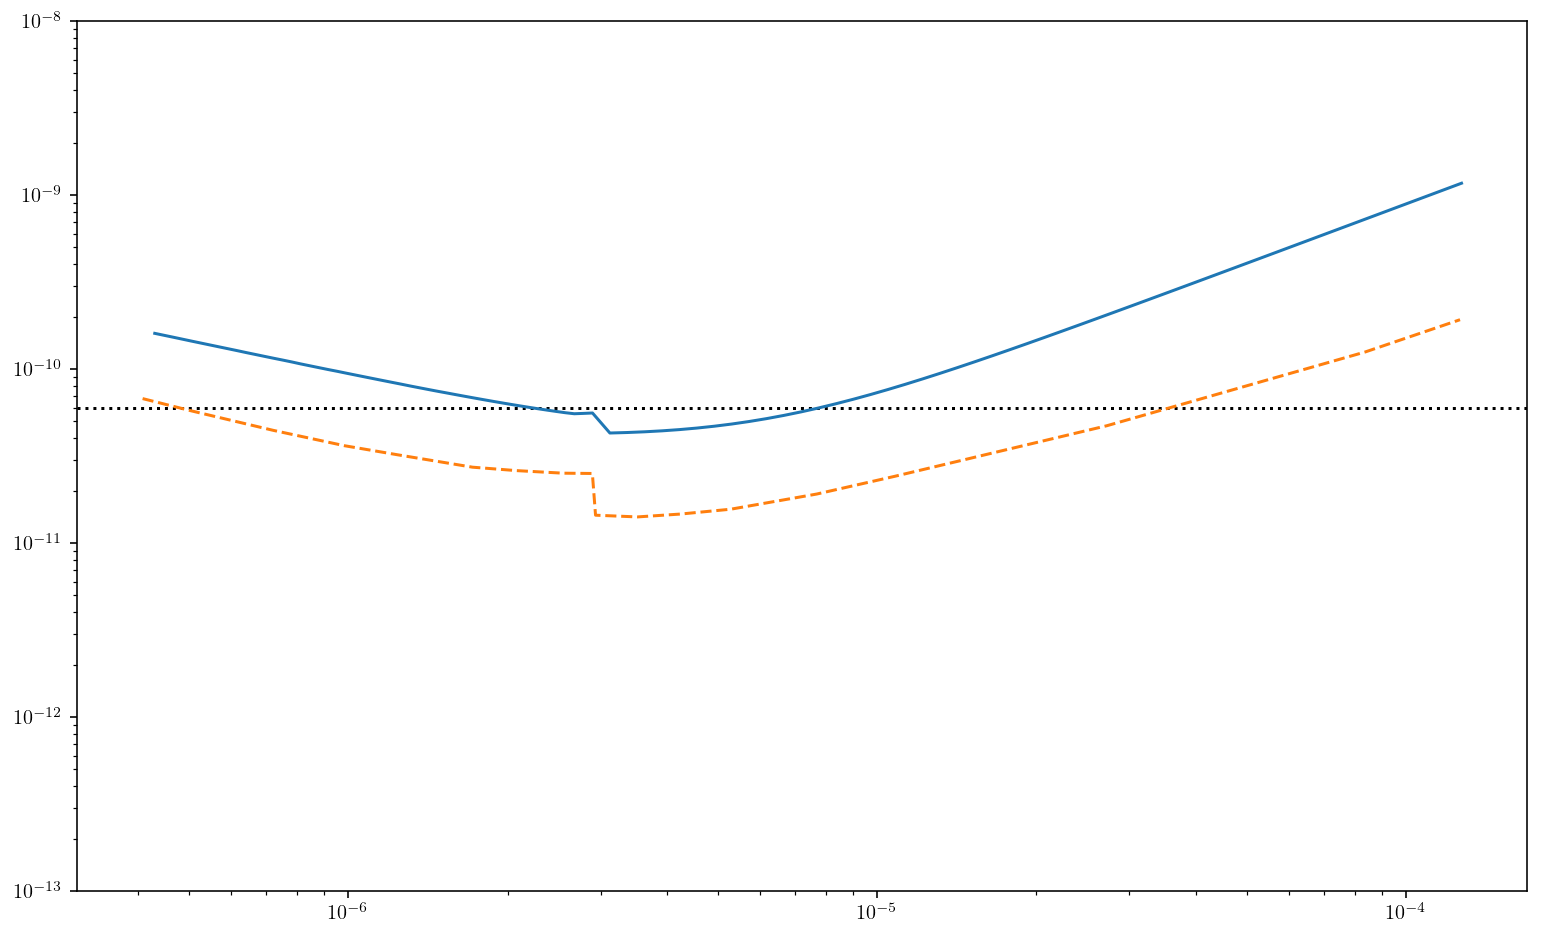

In [57]:
ghosh = np.loadtxt("../data/cygA_bounds.csv", delimiter=",")

z_val = 2.
ga_reach = ec.ga_reach(z_val, bounds_out['S/N'], bounds_out['ga'])
ma_ga = np.vstack((ma_new, ga_reach)).T

plt.axhline(6.e-11, color='k', ls=':')
plt.plot(ghosh[:,0], ghosh[:,1]*sqrt(z_val), color='C1', ls='--')
plt.loglog(ma_ga[:,0], ma_ga[:,1])
# plt.axvline(ma_ref, color='k', ls=':')

plt.xscale("log");plt.yscale("log");
plt.ylim(1.e-13, 1.e-8);